## Created by: Diksha Vedi


In [40]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv(r'/content/Training_Set.csv')

In [5]:
df.head()

,Attribute 1 (a1),Attribute 2 (a2),Class Label
0,2,11,2
1,2,13,2
2,2,15,2
3,2,27,1
4,2,39,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Attribute 1 (a1)  30 non-null     int64
 1   Attribute 2 (a2)  30 non-null     int64
 2   Class Label       30 non-null     int64
dtypes: int64(3)
memory usage: 848.0 bytes


#### No missing values detected

### Data Visualisation

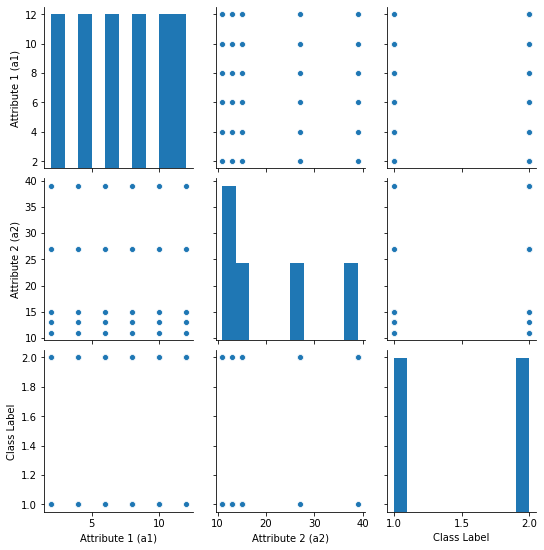

In [ ]:
sns.pairplot(df)
plt.show()

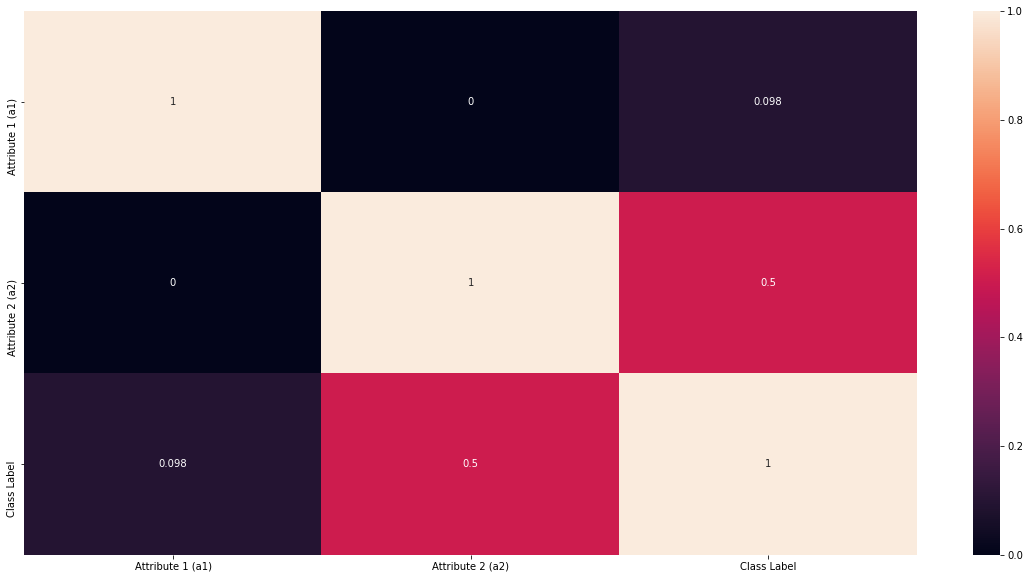

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,10)) # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

### We can see that attribute 1 and class label are very less correlated

### Now let's check for outliers

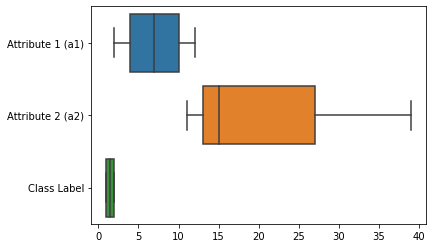

In [ ]:
import seaborn as sns

sns.boxplot(data=df,orient='h')

In [7]:
df.describe()

,Attribute 1 (a1),Attribute 2 (a2),Class Label
count,30.000000,30.000000,30.000000
mean,7.000000,21.000000,1.500000
std,3.474042,10.763924,0.508548
min,2.000000,11.000000,1.000000
25%,4.000000,13.000000,1.000000
50%,7.000000,15.000000,1.500000
75%,10.000000,27.000000,2.000000
max,12.000000,39.000000,2.000000


#### Clearly no outliers are present so no treatement required

### Splittinig data 

In [8]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [14]:
# Putting feature variable to X
X_train = df.drop('Class Label',axis=1)

# Putting response variable to y
y_train = df[['Class Label']]

val=pd.read_csv(r'/content/Validation_Set.csv')

In [15]:
val.head()

,Attribute 1 (a1),Attribute 2 (a2),True Class Label,Class Label as predicted by the decision tree,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2,35,1,1,NaN,NaN,NaN
1,12,13,2,1,NaN,NaN,NaN
2,-4,45,2,2,NaN,NaN,NaN
3,2,17,2,2,NaN,NaN,NaN


In [41]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Attribute 1 (a1)                               4 non-null      int64  
 1   Attribute 2 (a2)                               4 non-null      int64  
 2   True Class Label                               4 non-null      int64  
 3   Class Label as predicted by the decision tree  4 non-null      int64  
 4   Unnamed: 4                                     0 non-null      float64
 5   Unnamed: 5                                     0 non-null      float64
 6   Unnamed: 6                                     0 non-null      float64
dtypes: float64(3), int64(4)
memory usage: 352.0 bytes


In [17]:
X_test=val[['Attribute 1 (a1)','Attribute 2 (a2)']]
y_test=val[['True Class Label']]


In [19]:
X_test.head()

,Attribute 1 (a1),Attribute 2 (a2)
0,2,35
1,12,13
2,-4,45
3,2,17


In [128]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=4)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [129]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [130]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[1 0]
 [2 1]]
0.5


### Plotting the Decision Tree

In [131]:
# Importing required packages for visualization
from IPython.display import Image  
#from sklearn.externals.six import StringIO 
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df.columns[0:2])
features

['Attribute 1 (a1)', 'Attribute 2 (a2)']

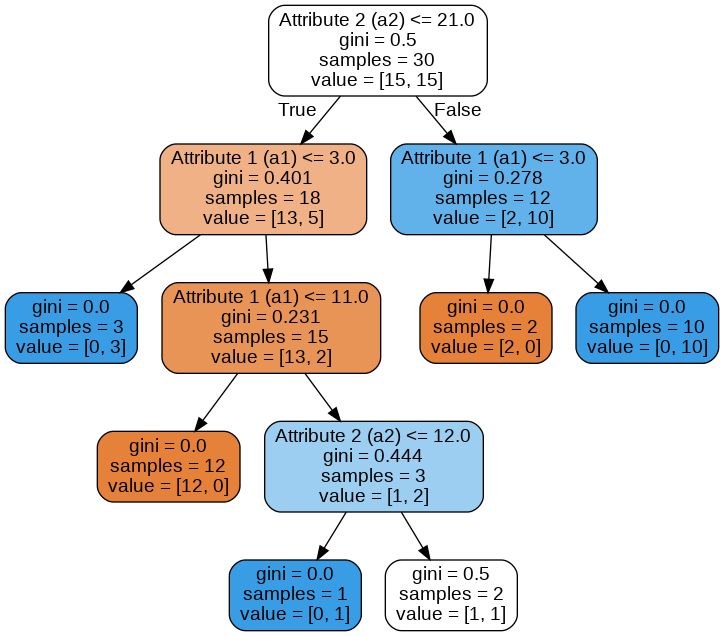

In [132]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Grid Search to Find Optimal Hyperparameters

In [96]:
# Create the parameter grid 
param_grid = {
    #'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 100, 10),
    'min_samples_split': range(1, 100, 10),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [97]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002993,0.000772,0.000000,0.000000,entropy,1,1,"{'criterion': 'entropy', 'min_samples_leaf': 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,200
1,0.002762,0.000964,0.001314,0.000769,entropy,1,11,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.166667,1.0,1.0,0.833333,0.833333,0.766667,0.309121,1
2,0.002055,0.000071,0.000898,0.000047,entropy,1,21,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.166667,1.0,1.0,0.833333,0.833333,0.766667,0.309121,1
3,0.002084,0.000075,0.000962,0.000076,entropy,1,31,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.500000,0.5,0.5,0.500000,0.500000,0.500000,0.000000,5
4,0.001986,0.000133,0.000885,0.000065,entropy,1,41,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.500000,0.5,0.5,0.500000,0.500000,0.500000,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.001825,0.000042,0.000817,0.000039,gini,91,51,"{'criterion': 'gini', 'min_samples_leaf': 91, ...",0.500000,0.5,0.5,0.500000,0.500000,0.500000,0.000000,5
196,0.001800,0.000027,0.000808,0.000010,gini,91,61,"{'criterion': 'gini', 'min_samples_leaf': 91, ...",0.500000,0.5,0.5,0.500000,0.500000,0.500000,0.000000,5
197,0.001804,0.000025,0.000845,0.000067,gini,91,71,"{'criterion': 'gini', 'min_samples_leaf': 91, ...",0.500000,0.5,0.5,0.500000,0.500000,0.500000,0.000000,5
198,0.001801,0.000053,0.000833,0.000052,gini,91,81,"{'criterion': 'gini', 'min_samples_leaf': 91, ...",0.500000,0.5,0.5,0.500000,0.500000,0.500000,0.000000,5


In [98]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7666666666666668
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


**Running the model with best parameters obtained from grid search.**

### varrying max_depth

In [112]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=1, 
                                  min_samples_leaf=1,
                                  min_samples_split=11)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [113]:
# accuracy score
clf_gini.score(X_test,y_test)

0.25

In [115]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=2, 
                                  min_samples_leaf=1,
                                  min_samples_split=11)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [116]:
# accuracy score
clf_gini.score(X_test,y_test)

0.5

In [117]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=1,
                                  min_samples_split=11)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [118]:
# accuracy score
clf_gini.score(X_test,y_test)

0.75

In [119]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=1,
                                  min_samples_split=11)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [120]:
# accuracy score
clf_gini.score(X_test,y_test)

0.75

#### Now we can see that our final accuracy has saturated at max_depth:3 i.e. 0.75

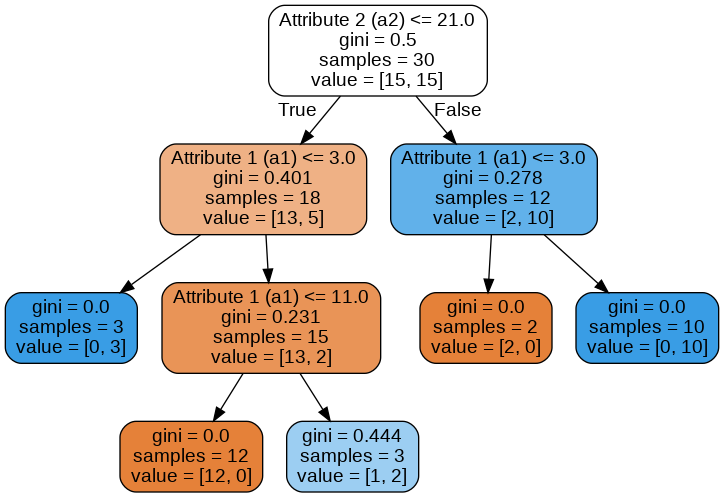

In [106]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [121]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [122]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[1 0]
 [1 2]]
